In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_TO_DATA = 'quality_test.csv'
Data = pd.read_csv(PATH_TO_DATA)
data = pd.read_csv(PATH_TO_DATA)
X1 = Data[Data.columns[0]]
X2 = Data[Data.columns[1]]
X = Data[Data.columns[0:2]]
Y = Data[Data.columns[2]]

new_x = []
i=1

while (i<7):
    j=0
    k=i
    while (j<=i) :
        new_x.append( ((X1)**k) * ((X2)**j) )
        j=j+1
        k=k-1
    i=i+1


new_x=np.transpose(new_x)

def my_plot(b,n,xx,yy):
    Z = [] 
    for q1 in range(len(xx)):
        for q2 in range(len(xx[q1])):
            i = 1
            z = 0
            l=0
            while (i < 7):
                j = 0
                k = i
                while (j <= i):
                    z = z + n[0][l]*( ((xx[q1][q2])**k) * ((yy[q1][q2])**j) )
                    j = j+1
                    k = k-1
                    l = l+1
                i = i+1

            Z.append(z+b)

    return Z

new_x = np.asarray(new_x, dtype=np.float32)
clf = LogisticRegression(random_state=10).fit(new_x, Y)
n=clf.coef_
b=clf.intercept_
y_pred = clf.predict(new_x)

j = 0
for i in range(len(Y)):
    if (y_pred[i] != Y[i]):
        j += 1
acc = (1 - (j/len(Y)))*100
print("The accuracy with out normalizing of the model is: %.1f%%" % (acc))



h = .01
X_train_array = X.to_numpy()
y_train_array = Y.to_numpy() 
x_train_min, x_train_max = X_train_array[:, 0].min() -1 , X_train_array[:, 0].max() +1
y_train_min, y_train_max = X_train_array[:, 1].min() -1 , X_train_array[:, 1].max() +1  

xx, yy = np.meshgrid(np.arange(x_train_min, x_train_max, h),np.arange(y_train_min, y_train_max, h))

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy with out normalizing of the model is: 81.2%


<Figure size 640x480 with 1 Axes>

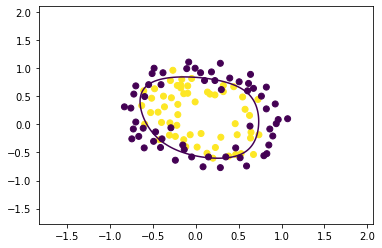

In [7]:
Z=my_plot(b,n,xx,yy)

Z = np.asarray(Z, dtype=np.float32)
Z = Z.reshape(xx.shape)
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=Y)
plt.contour(xx, yy, Z,levels=[0])
plt.show()

In [11]:
b

array([1.1280414])

In [9]:
n

array([[ 0.59423191,  1.1368661 , -1.84353535, -0.91942036, -1.28755011,
         0.12990871, -0.34583718, -0.34926112, -0.1782815 , -1.42024458,
        -0.04473337, -0.59330763, -0.27180358, -1.1585927 , -0.243286  ,
        -0.20038033, -0.04170846, -0.27007468, -0.28963332, -0.4563331 ,
        -1.03758254,  0.03117316, -0.28956002,  0.01881594, -0.32212101,
        -0.13981272, -0.91490479]])